In [48]:
from calibrate_camera import *
from thresholding import *
from perspective_transform import *
from lane_finding import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


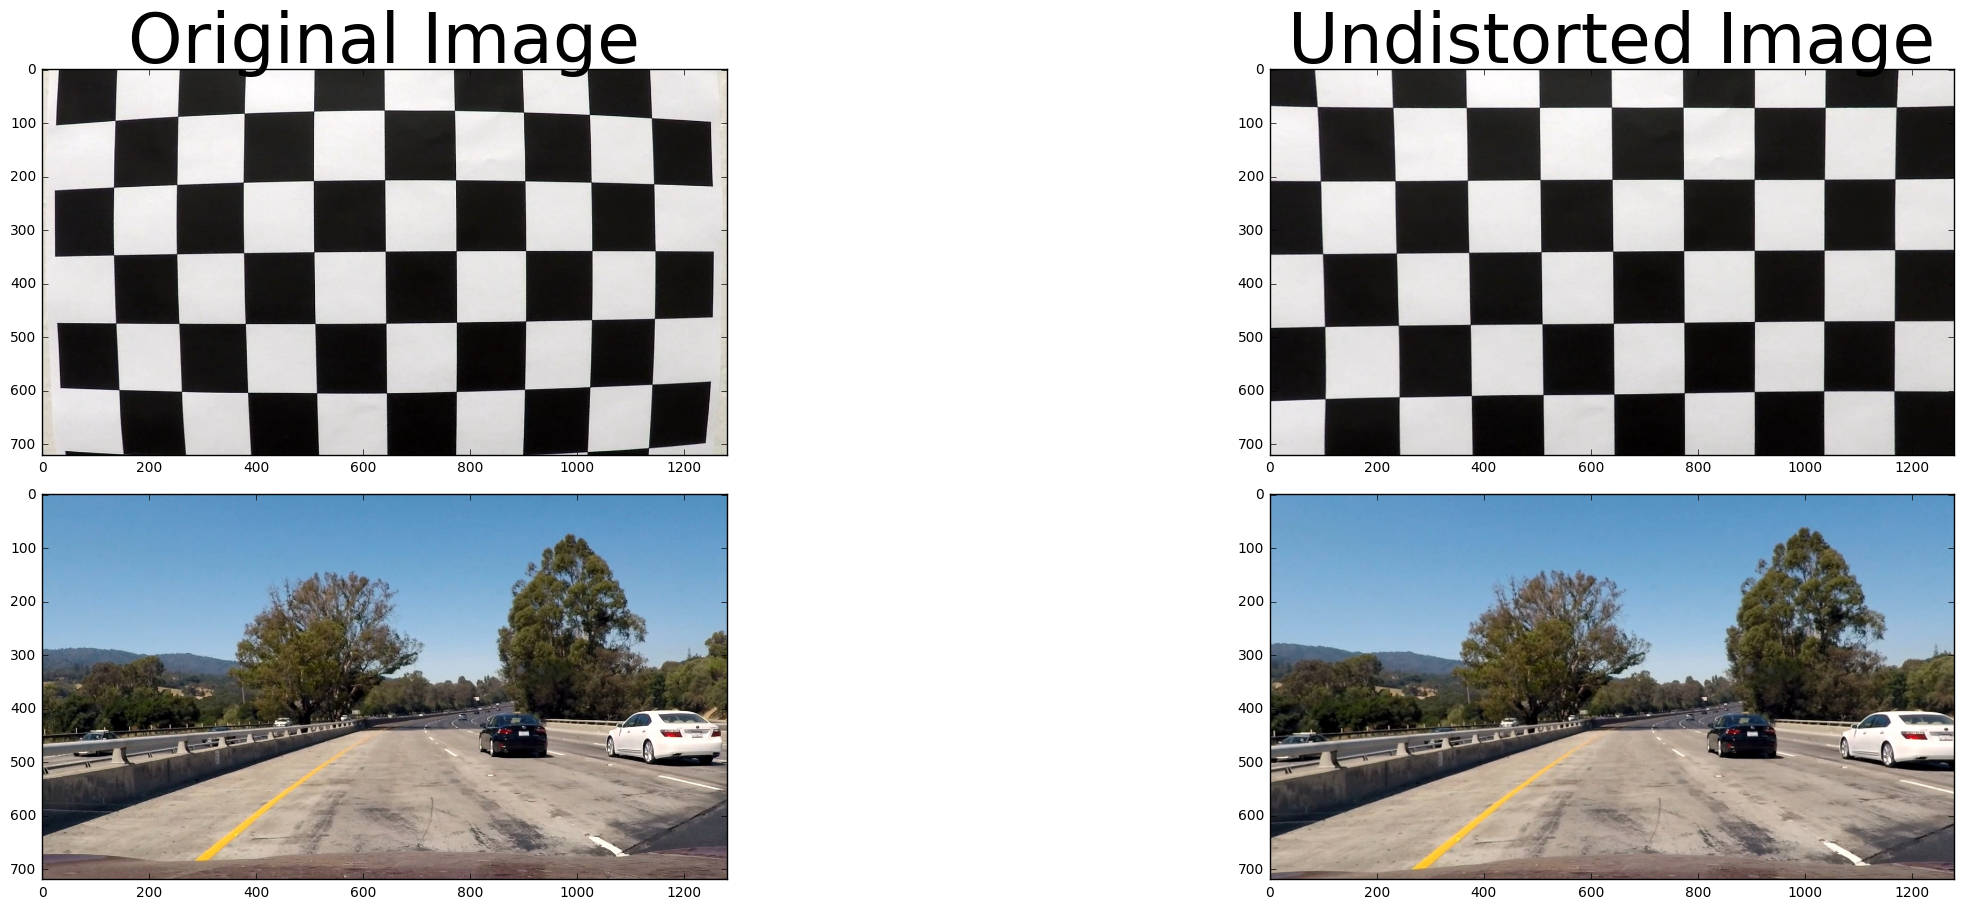

In [3]:
calibration_imgfolder = './camera_cal/'
imgpoints, objpoints = calibrate_pts(calibration_imgfolder)

img = mpimg.imread('./camera_cal/calibration1.jpg')
undistorted = undistort(img, imgpoints, objpoints)

f, axarr = plt.subplots(2, 2, figsize=(24, 9))
f.tight_layout()
axarr[0, 0].imshow(img)
axarr[0, 0].set_title('Original Image', fontsize=50)
axarr[0, 1].imshow(undistorted)
axarr[0, 1].set_title('Undistorted Image', fontsize=50)

img = mpimg.imread('./test_images/test1.jpg')
undistorted = undistort(img, imgpoints, objpoints)

axarr[1, 0].imshow(img)
axarr[1, 1].imshow(undistorted)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

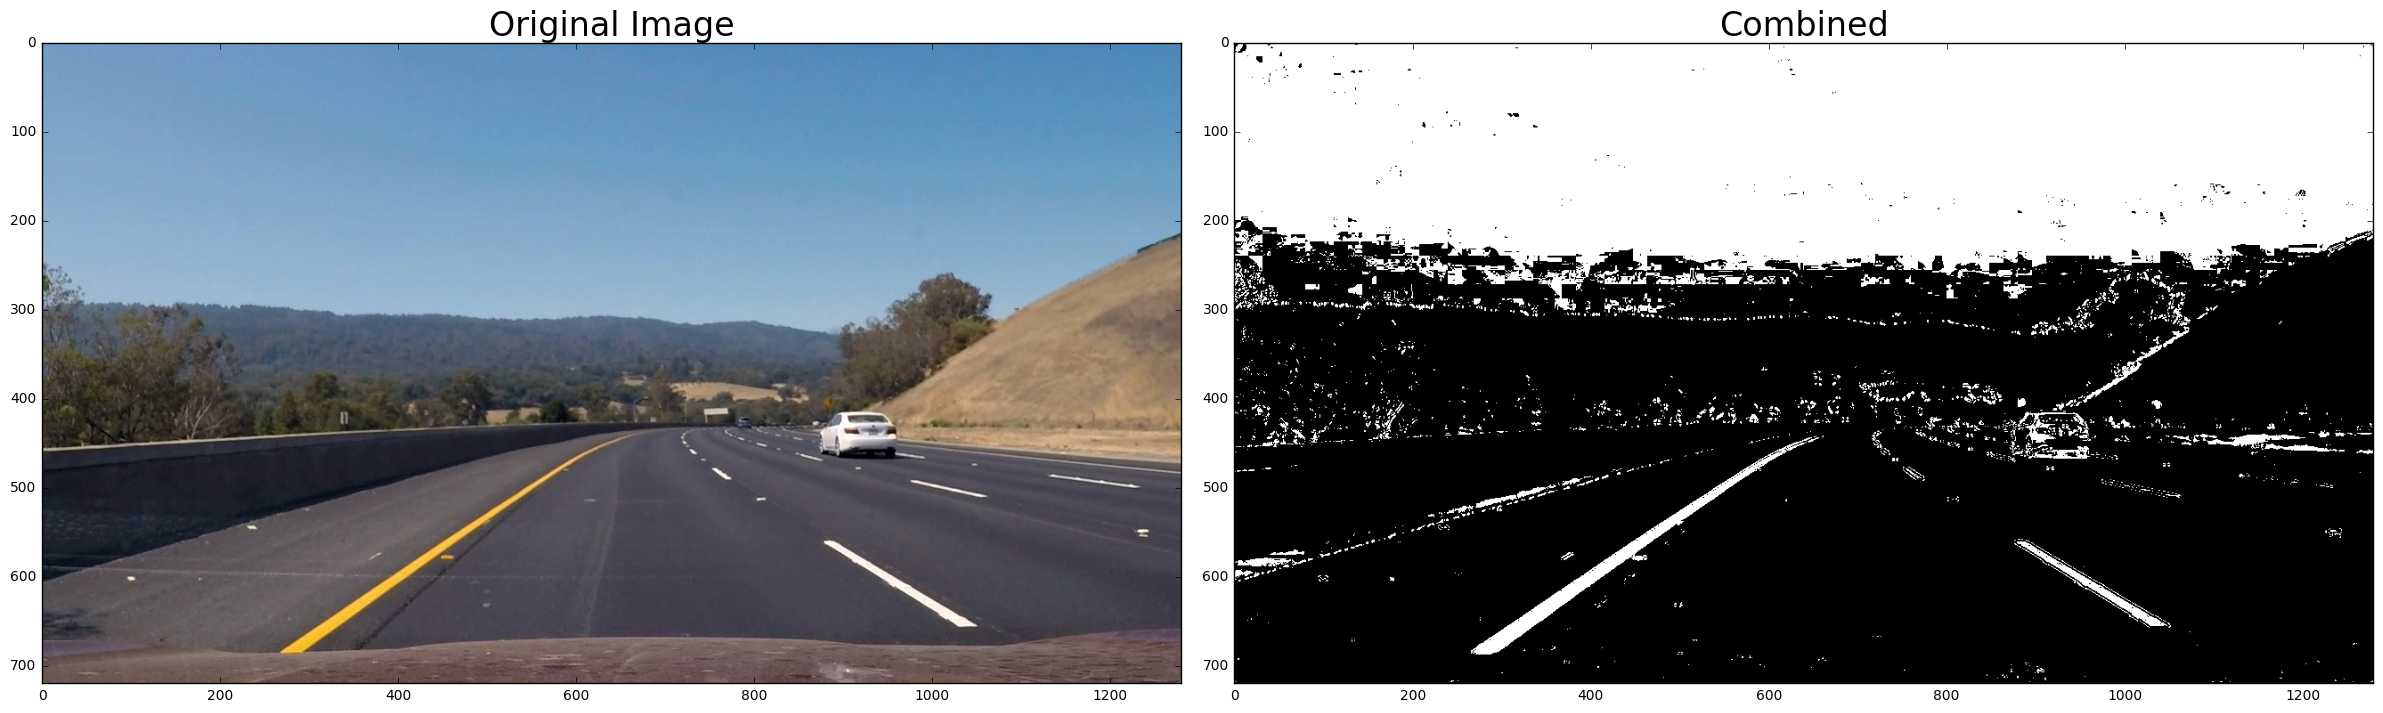

In [4]:
img = mpimg.imread('./test_images/test3.jpg')
binary_output = combine_thresh(img)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=24)

ax2.imshow(binary_output, cmap='gray')
ax2.set_title('Combined', fontsize=24)

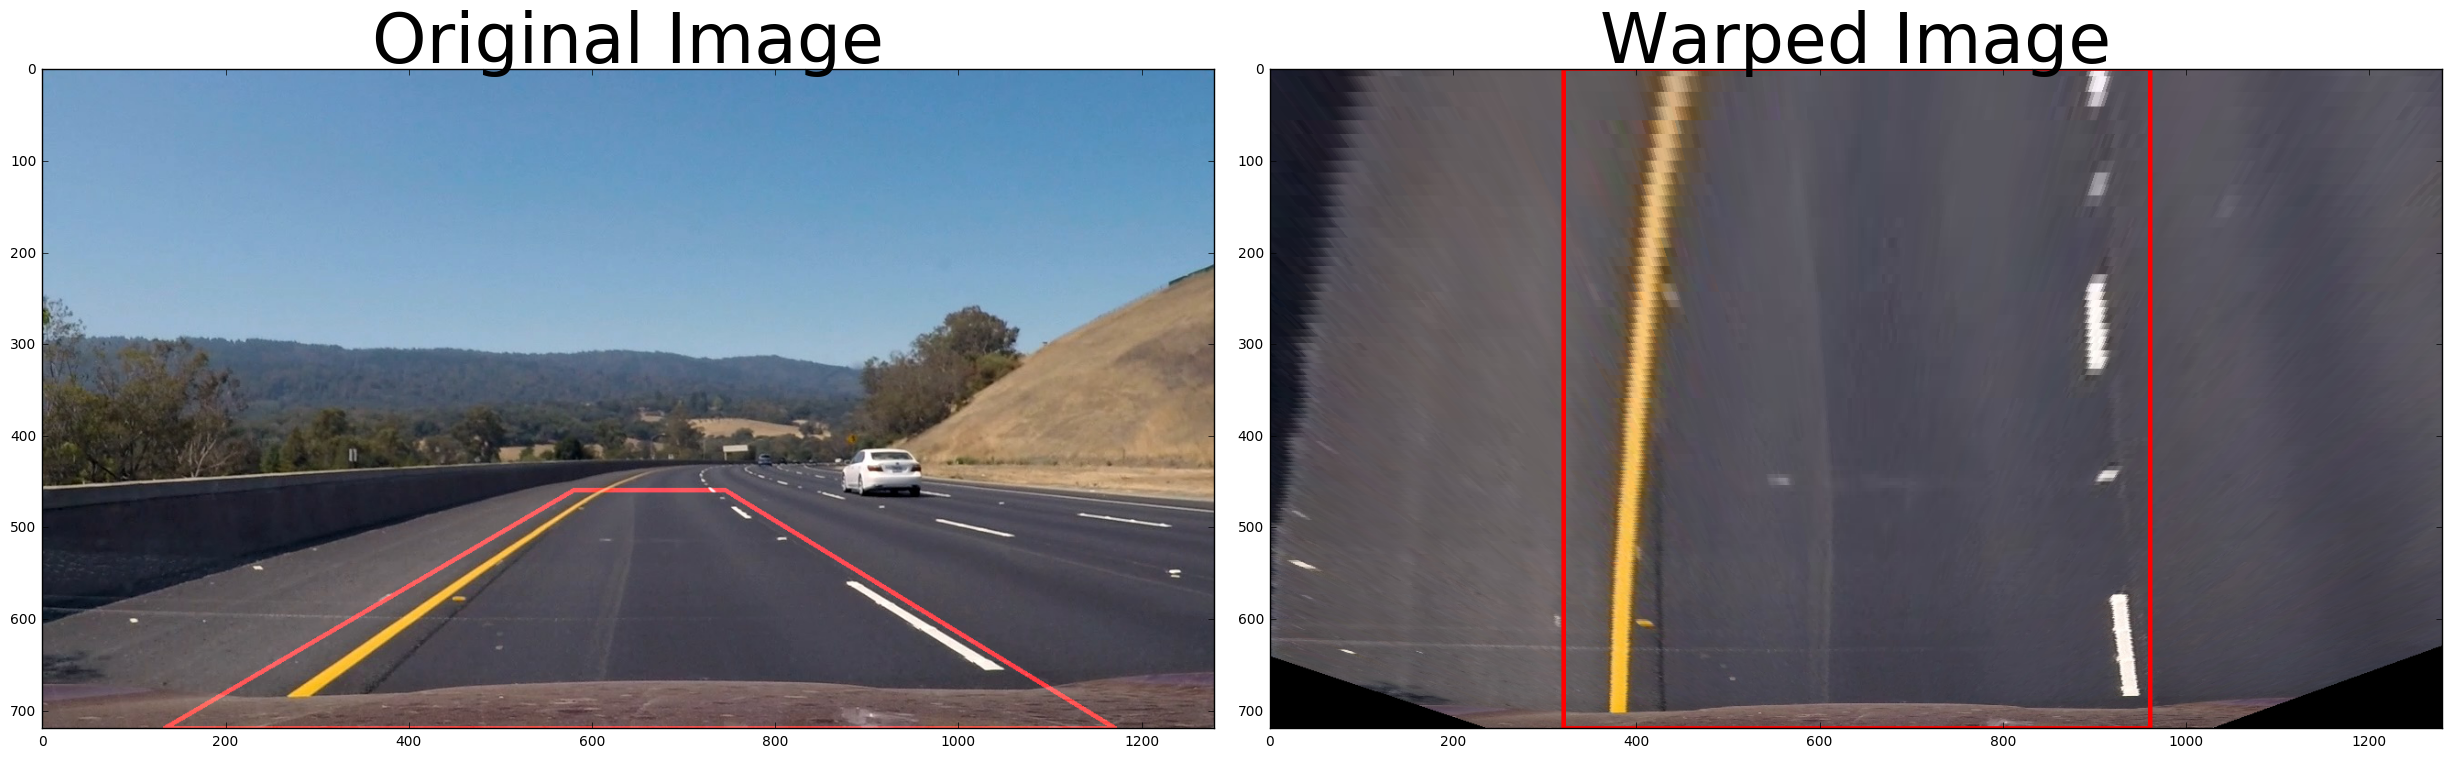

In [5]:
warped, src, dst = warp(img)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))

blank = np.zeros_like(img)

cv2.polylines(blank, np.int32([src]), 1, 255, thickness=3)
result = cv2.addWeighted(img, 1, blank, 1., 0)

f.tight_layout()
ax1.imshow(result, cmap='gray')
ax1.set_title('Original Image', fontsize=50)


for x, y in dst:
    ax2.plot(x, y, '-')

cv2.polylines(warped, np.int32([dst]), 1, 255, thickness=3)
ax2.imshow(warped, cmap='gray')
ax2.set_title('Warped Image', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

(720, 0)

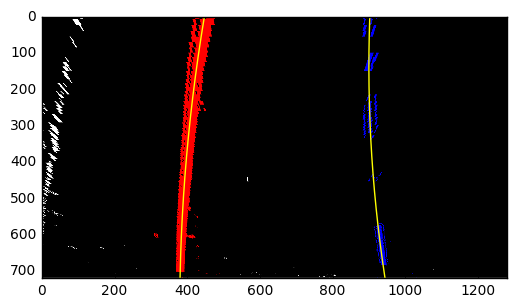

In [18]:
binary_warped, src, dst = warp(binary_output)

left_lane_inds, right_lane_inds, left_fit, right_fit, leftx, lefty, rightx, righty = lane_fit(binary_warped)

# Generate x and y values for plotting
fity = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
fit_leftx = left_fit[0]*fity**2 + left_fit[1]*fity + left_fit[2]
fit_rightx = right_fit[0]*fity**2 + right_fit[1]*fity + right_fit[2]

out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255

nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(fit_leftx, fity, color='yellow')
plt.plot(fit_rightx, fity, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

(720, 0)

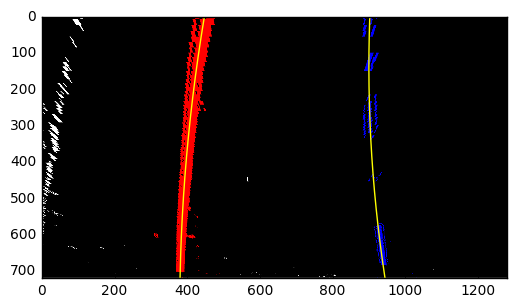

In [57]:
plt.imshow(out_img)

fit_leftx = left_line.

plt.plot(fit_leftx, fity, color='yellow')
plt.plot(fit_rightx, fity, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

In [49]:
left_line = Line()
right_line = Line()

In [55]:
if left_line.detected == True:
    left_line, right_line = detect_lines(binary_warped, left_line, right_line)
    
else:
    print("yes")
    left_line, right_line = detect_lines_blind(binary_warped)

(720, 0)

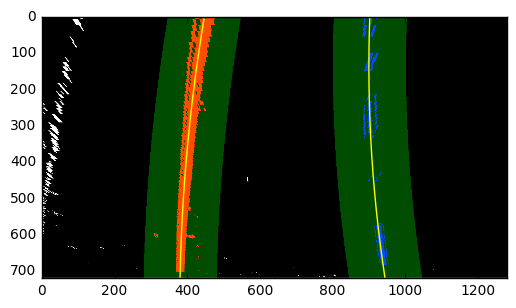

In [7]:
left_lane_inds, right_lane_inds, left_fit, right_fit, leftx, lefty, rightx, righty = lane_fit_found(binary_warped, left_fit, right_fit)

margin = 100

# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped)) * 255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([fit_leftx-margin, fity]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([fit_leftx+margin, fity])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([fit_rightx-margin, fity]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([fit_rightx+margin, fity])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(fit_leftx, fity, color='yellow')
plt.plot(fit_rightx, fity, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

1601.15405584 1255.82009146


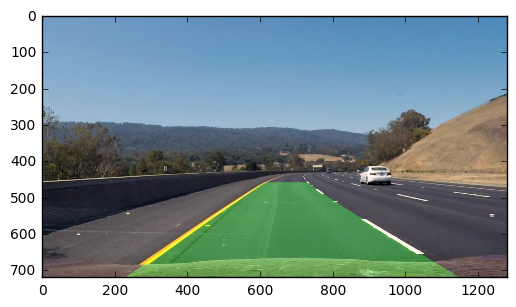

In [12]:
left_curverad, right_curverad = compute_curvature(img, left_fit, right_fit, leftx, lefty, rightx, righty)
print(left_curverad, right_curverad)

lane_img = draw_lane_road(img, binary_output, fit_leftx, fit_rightx, fity, src, dst)
plt.imshow(lane_img)

In [22]:
left_line, right_line = Line(), Line()

if left_line.detected == False:
    left_lane_inds, right_lane_inds, left_fit, right_fit, leftx, lefty, rightx, righty = lane_fit(binary_warped)
    
else:
    left_lane_inds, right_lane_inds, left_fit, right_fit, leftx, lefty, rightx, righty = lane_fit_found(binary_warped, left_fit, right_fit)


left_line.current_fit = left_fit
left_line.allx = leftx
left_line.ally = lefty

right_line.current_fit = right_fit
right_line.allx = rightx
right_line.ally = righty